In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy import stats

In [5]:
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, LassoLarsIC

In [49]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [92]:
from statsmodels.graphics.gofplots import qqplot

In [97]:
from scipy.stats import shapiro

In [15]:
X = pd.read_csv('dengue_features_train.csv')
target = pd.read_csv('dengue_labels_train.csv')

In [16]:
X.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [17]:
X = X[['city', 'reanalysis_max_air_temp_k', 'reanalysis_dew_point_temp_k',
'reanalysis_relative_humidity_percent', 'ndvi_se', 'reanalysis_sat_precip_amt_mm']]

In [18]:
cols = ['reanalysis_max_air_temp_k', 'reanalysis_dew_point_temp_k',
'reanalysis_relative_humidity_percent', 'ndvi_se', 'reanalysis_sat_precip_amt_mm']

In [19]:
target = target['total_cases']

In [20]:
X = X.fillna(X.mean())

Step 1

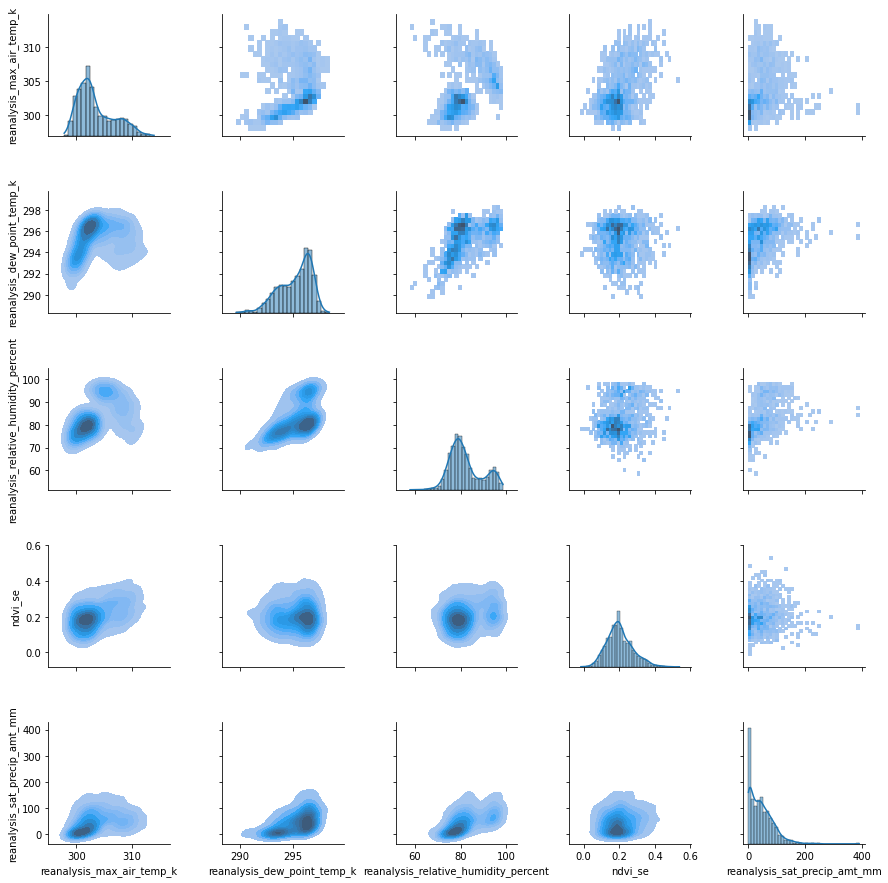

In [21]:
g = sns.PairGrid(X, vars=cols)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

Step 2

In [ ]:
X[cols].mean()

reanalysis_max_air_temp_k               303.427109
reanalysis_dew_point_temp_k             295.246356
reanalysis_relative_humidity_percent     82.161959
ndvi_se                                   0.203783
reanalysis_sat_precip_amt_mm             45.760388
dtype: float64

In [ ]:
X[cols].cov()

,reanalysis_max_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_relative_humidity_percent,ndvi_se,reanalysis_sat_precip_amt_mm
reanalysis_max_air_temp_k,10.390734,1.263193,9.194521,0.110211,39.610710
reanalysis_dew_point_temp_k,1.263193,2.318160,6.010947,0.000313,28.770208
reanalysis_relative_humidity_percent,9.194521,6.010947,50.826507,0.112210,155.062428
ndvi_se,0.110211,0.000313,0.112210,0.005373,0.237017
reanalysis_sat_precip_amt_mm,39.610710,28.770208,155.062428,0.237017,1893.973517


Step 3

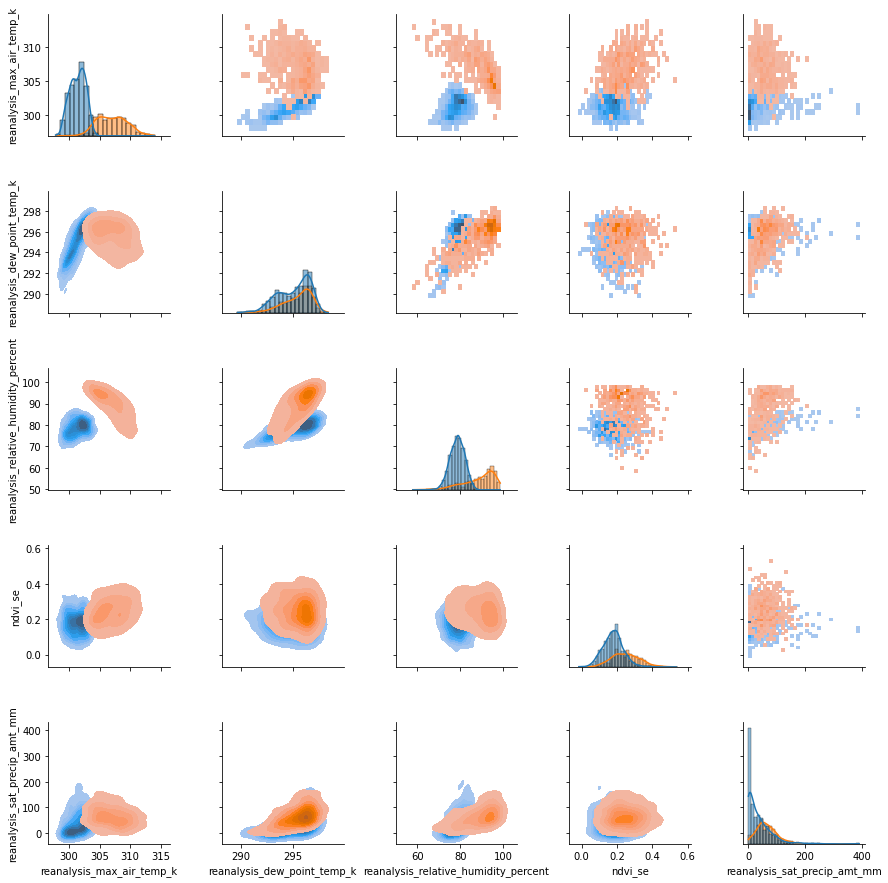

In [ ]:
g = sns.PairGrid(X, hue='city')
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [ ]:
X.loc[X['city'] == 'sj', cols].mean()

reanalysis_max_air_temp_k               301.411819
reanalysis_dew_point_temp_k             295.110396
reanalysis_relative_humidity_percent     78.591218
ndvi_se                                   0.178186
reanalysis_sat_precip_amt_mm             35.569747
dtype: float64

In [22]:
X.loc[X['city'] == 'sj', cols].cov()

,reanalysis_max_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_relative_humidity_percent,ndvi_se,reanalysis_sat_precip_amt_mm
reanalysis_max_air_temp_k,1.600956,1.665538,1.269575,-0.000346,14.343611
reanalysis_dew_point_temp_k,1.665538,2.449025,3.595068,-0.005442,27.898695
reanalysis_relative_humidity_percent,1.269575,3.595068,11.497250,-0.020953,75.308738
ndvi_se,-0.000346,-0.005442,-0.020953,0.003215,-0.300517
reanalysis_sat_precip_amt_mm,14.343611,27.898695,75.308738,-0.300517,1971.564502


In [ ]:
X.loc[X['city'] == 'iq', cols].mean()

reanalysis_max_air_temp_k               307.054632
reanalysis_dew_point_temp_k             295.491085
reanalysis_relative_humidity_percent     88.589293
ndvi_se                                   0.249859
reanalysis_sat_precip_amt_mm             64.103541
dtype: float64

In [23]:
X.loc[X['city'] == 'iq', cols].cov()

,reanalysis_max_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_relative_humidity_percent,ndvi_se,reanalysis_sat_precip_amt_mm
reanalysis_max_air_temp_k,5.737033,-0.842829,-12.848765,0.049099,-18.499655
reanalysis_dew_point_temp_k,-0.842829,1.993524,7.923309,-0.006893,23.399230
reanalysis_relative_humidity_percent,-12.848765,7.923309,57.392950,-0.109232,115.291201
ndvi_se,0.049099,-0.006893,-0.109232,0.005961,-0.111386
reanalysis_sat_precip_amt_mm,-18.499655,23.399230,115.291201,-0.111386,1233.431179


Step 4

In [ ]:
def get_corr(x, y):
  r, p = stats.pearsonr(x,y)
  r_z = np.arctanh(r)
  se = 1/np.sqrt(x.size-3)
  alpha = 0.05
  z = stats.norm.ppf(1-alpha/2)
  low_z, high_z = r_z-z*se, r_z+z*se
  low, high = np.tanh((low_z, high_z))
  return '{}({} - {})'.format(round(r, 4), round(low, 4), round(high, 4))

In [ ]:
cors = pd.DataFrame(columns=cols, index=cols)

In [ ]:
for i in cols:
  for j in cols:
    cors.loc[i,j] = get_corr(X[i],X[j])
cors

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in arctanh
  This is separate from the ipykernel package so we can avoid doing imports until


,reanalysis_max_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_relative_humidity_percent,ndvi_se,reanalysis_sat_precip_amt_mm
reanalysis_max_air_temp_k,1.0(1.0 - 1.0),0.2574(0.2088 - 0.3047),0.4001(0.356 - 0.4424),0.4664(0.4253 - 0.5057),0.2824(0.2344 - 0.329)
reanalysis_dew_point_temp_k,0.2574(0.2088 - 0.3047),1.0(1.0 - 1.0),0.5538(0.5171 - 0.5884),0.0028(-0.0486 - 0.0542),0.4342(0.3916 - 0.475)
reanalysis_relative_humidity_percent,0.4001(0.356 - 0.4424),0.5538(0.5171 - 0.5884),1.0(1.0 - 1.0),0.2147(0.1652 - 0.2632),0.4998(0.4602 - 0.5374)
ndvi_se,0.4664(0.4253 - 0.5057),0.0028(-0.0486 - 0.0542),0.2147(0.1652 - 0.2632),1.0(1.0 - 1.0),0.0743(0.023 - 0.1252)
reanalysis_sat_precip_amt_mm,0.2824(0.2344 - 0.329),0.4342(0.3916 - 0.475),0.4998(0.4602 - 0.5374),0.0743(0.023 - 0.1252),1.0(1.0 - 1.0)


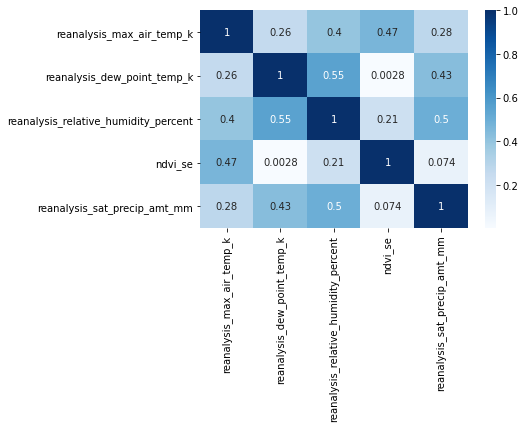

In [35]:
g = sns.heatmap(X[cols].corr(), cmap='Blues', annot=True)

Step 5

In [36]:
X['y'] = target
X.pop('city')
print(X.corr()['y'][:])

reanalysis_max_air_temp_k              -0.191066
reanalysis_dew_point_temp_k             0.142322
reanalysis_relative_humidity_percent   -0.132259
ndvi_se                                -0.117769
reanalysis_sat_precip_amt_mm           -0.038670
y                                       1.000000
Name: y, dtype: float64


In [37]:
c = X.corr()['y'][:].values

In [38]:
c = c[:5]

In [ ]:
X.pop('y')

In [40]:
print(c.T.dot(np.linalg.inv(X.corr().values)).dot(c))

0.11150375047417853


Step 6 and 7

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X[cols], target, test_size=0.25, random_state=42)

In [53]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [54]:
print('R2 score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

R2 score: 0.10669471170335465
MSE: 2448.073713178458
MAE: 22.871021887271578


In [55]:
ls = Lasso(alpha=0.1)
ls.fit(X_train, y_train)
y_pred = ls.predict(X_test)

In [56]:
print('R2 score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

R2 score: 0.10620358246976036
MSE: 2449.41963666317
MAE: 22.75138162989752


In [57]:
lsic = LassoLarsIC(criterion='aic')
lsic.fit(X_train, y_train)
y_pred = lsic.predict(X_test)

In [58]:
print('R2 score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

R2 score: 0.1021028088672038
MSE: 2460.6576716234886
MAE: 22.70892942620966


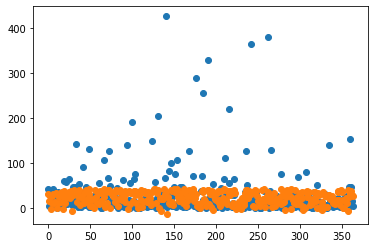

In [59]:
plt.scatter(list(range(len(y_test))), y_test, label='True')
plt.scatter(list(range(len(y_test))), lr.predict(X_test), label='Predict')

In [84]:
poly = PolynomialFeatures(3)
X_train_new = poly.fit_transform(X_train)
poly = PolynomialFeatures(3)
X_test_new = poly.fit_transform(X_test)

In [85]:
lrp = LinearRegression(normalize=True)
lrp.fit(X_train_new, y_train)
y_pred = lrp.predict(X_test_new)

In [86]:
print('R2 score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

R2 score: 0.12600254323059223
MSE: 2395.1612369628106
MAE: 22.966742688984414


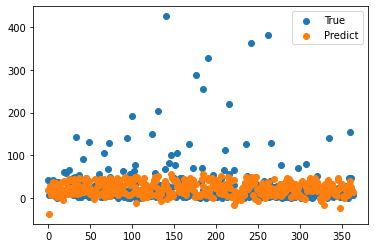

In [89]:
plt.scatter(list(range(len(y_test))), y_test, label='True')
plt.scatter(list(range(len(y_test))), lrp.predict(X_test_new), label='Predict')
plt.legend()

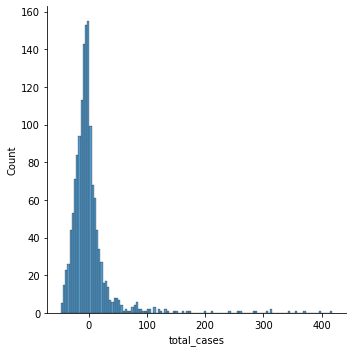

In [88]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X[cols])
sns.displot((target - lrp.predict(X_poly)), kde=False)

In [90]:
res = (target - lrp.predict(X_poly))

In [91]:
res.mean()

1.519966757743732

In [93]:
res.std()

40.44772289154652

In [95]:
res

0      -13.232570
1      -20.236653
2      -30.681532
3      -38.934517
4      -40.695749
          ...    
1451    -2.578544
1452     0.228589
1453    -1.679577
1454    -0.877496
1455    -4.556189
Name: total_cases, Length: 1456, dtype: float64

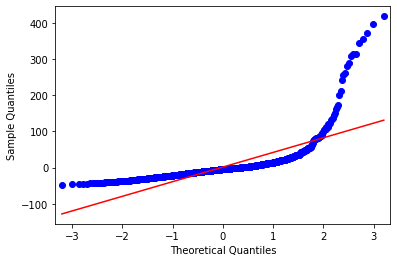

In [96]:
qqplot(res, line='s')
plt.show()

In [98]:
stat, p = shapiro(res)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.552, p=0.000
Sample does not look Gaussian (reject H0)


In [66]:
X_new = X[cols].drop(columns='reanalysis_relative_humidity_percent')

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_new, target, test_size=0.25, random_state=42)

In [74]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [75]:
print('R2 score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

R2 score: 0.07143700193977676
MSE: 2544.6963052417755
MAE: 24.22757404829562


In [76]:
ls = Lasso(alpha=0.1)
ls.fit(X_train, y_train)
y_pred = ls.predict(X_test)

In [77]:
print('R2 score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

R2 score: 0.07115391915452329
MSE: 2545.4720842887727
MAE: 24.226596366533418


In [78]:
poly = PolynomialFeatures(3)
X_train_new = poly.fit_transform(X_train)
poly = PolynomialFeatures(3)
X_test_new = poly.fit_transform(X_test)

In [79]:
lrp = LinearRegression(normalize=True)
lrp.fit(X_train_new, y_train)
y_pred = lrp.predict(X_test_new)

In [80]:
print('R2 score: {}'.format(r2_score(y_test, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred)))
print('MAE: {}'.format(mean_absolute_error(y_test, y_pred)))

R2 score: 0.09596182519175411
MSE: 2477.486835075092
MAE: 23.496728972189004
